# Example of using the Borehole3D class

## Imports

In [1]:
from striplog import Component, Decor, Legend, Lexicon, Striplog
from core.omf import Borehole3D, striplog_legend_to_omf_legend 
from utils.lexicon.lexicon_memoris import lexicon_memoris, lithology_memoris, pollutant_memoris
from utils.io import boreholes_from_files, gdf_viewer
from core.core import Project
from core.orm import BoreholeOrm, PositionOrm, Base 
import random
from os import remove
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
from definitions import ROOT_DIR

/home/yanathan/.local/share/virtualenvs/GSDMA-DRfwm83x/lib/python3.8/site-packages/striplog/legend.py:687: UserWarning: This legend contains duplicate components.
  warnings.warn(w)
/home/yanathan/.local/share/virtualenvs/GSDMA-DRfwm83x/lib/python3.8/site-packages/striplog/legend.py:687: UserWarning: This legend contains duplicate components.
  warnings.warn(w)


## Reading of CSV files in a dir

In [2]:
#df = pd.read_csv('test_data_boreholes.csv', sep=',') # use english lexicon
df = pd.read_csv('test_litho_fr.csv', sep=',') # use french lexicon

## Data Checking

In [3]:
#pol = ['As', 'Ni', 'Cl', 'Hg', 'Pb', 'Zn']
pol = ['VR','VS','VI']
#df[['Pollutant', 'Concentration']] = ''
df[['Pollutant', 'Concentration']] = ''
df['Pollutant'] = df['Pollutant'].apply(lambda x: random.sample(pol, 1)[0])
df['Concentration'] = df['Concentration'].apply(lambda x: np.random.randint(0,100))
df['Unit'] = 'mg/l'

In [4]:
df['Lithology'] = df['Lithology'].replace({'Grès':'Marne', 'Calcaire':'Dolomie'})

In [5]:
df.loc[35.5, :] = ['BH007',152794.0, 121111.0, 60.0, 0.57, 45, 'Calcaire', 'Bleu', 4, 41, 45, 'Cl', 78, 'mg/l']
df.loc[25.5, :] = ['BH005',152473.0, 121460.0, 72.0, 0.61, 32, 'Schiste', 'gris', 3, 29, 32, 'Cl', 78, 'mg/l']
df.drop(index=4, inplace=True)
df.drop(columns='Colour', inplace=True)
df = df.sort_index().reset_index(drop=True)

In [6]:
gdf_viewer(df)

Rows : 996, columns : 13


interactive(children=(IntSlider(value=10, description='rows', max=996, min=10, readout=False), IntSlider(value…

## Create Boreholes from dataframes or files

In [7]:
bhs_df=[df[0:50]] # list of dataframes

In [8]:
boreholes, components, link_intv_comp = boreholes_from_files(bhs_df, verbose=False,
                                                litho_field=['Lithology', 'Pollutant'], 
                                                color_field='Colour', lexicon=lexicon_memoris, 
                                                diam_field='Diameter', thick_field='Thickness')


Dataframe 0 processing...
|__ID:'BH001'
{'lithology': 'sable', 'pollutant': 'vi'}
{'lithology': 'argile', 'pollutant': 'vs'}
{'lithology': 'marne', 'pollutant': 'vr'}
{'lithology': 'charbon', 'pollutant': 'vr'}
Summary : [Striplog(4 Intervals, start=0.0, stop=28.0)]
|__ID:'BH002'
{'lithology': 'sable', 'pollutant': 'vs'}
{'lithology': 'argile', 'pollutant': 'vr'}
{'lithology': 'marne', 'pollutant': 'vr'}
{'lithology': 'charbon', 'pollutant': 'vr'}
{'lithology': 'dolomie', 'pollutant': 'vr'}
Summary : [Striplog(5 Intervals, start=0.0, stop=37.0)]
|__ID:'BH003'
{'lithology': 'sable', 'pollutant': 'vs'}
{'lithology': 'argile', 'pollutant': 'vs'}
{'lithology': 'marne', 'pollutant': 'vs'}
{'lithology': 'charbon', 'pollutant': 'vr'}
{'lithology': 'dolomie', 'pollutant': 'vi'}
Summary : [Striplog(5 Intervals, start=0.0, stop=18.0)]
|__ID:'BH004'
{'lithology': 'sable', 'pollutant': 'vr'}
{'lithology': 'argile', 'pollutant': 'vr'}
{'lithology': 'marne', 'pollutant': 'vs'}
{'lithology': 'charbo

/home/yanathan/Projects/GSDMA/utils/io.py:469: SAWarning: relationship 'ComponentOrm.intervals' will copy column Components.id to column Linkintervalcomponent.comp_id, which conflicts with relationship(s): 'IntervalOrm.components' (copies Components.id to Linkintervalcomponent.comp_id). If this is not the intention, consider if these relationships should be linked with back_populates, or if viewonly=True should be applied to one or more if they are read-only. For the less common case that foreign key constraints are partially overlapping, the orm.foreign() annotation can be used to isolate the columns that should be written towards.   The 'overlaps' parameter may be used to remove this warning.
  boreholes.append(BoreholeOrm(id=bh_name))
/home/yanathan/Projects/GSDMA/utils/io.py:469: SAWarning: relationship 'ComponentOrm.intervals' will copy column Intervals.id to column Linkintervalcomponent.int_id, which conflicts with relationship(s): 'IntervalOrm.components' (copies Intervals.id to

In [9]:
boreholes

[<core.orm.BoreholeOrm>(Name=BH001, Length=28.0, Diameter=0.43, Intervals=4),
 <core.orm.BoreholeOrm>(Name=BH002, Length=37.0, Diameter=0.6, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH003, Length=18.0, Diameter=0.41, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH004, Length=26.0, Diameter=0.61, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH005, Length=32.0, Diameter=0.61, Intervals=6),
 <core.orm.BoreholeOrm>(Name=BH006, Length=26.0, Diameter=0.31, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH007, Length=45.0, Diameter=0.57, Intervals=6),
 <core.orm.BoreholeOrm>(Name=BH008, Length=35.0, Diameter=0.39, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH009, Length=40.0, Diameter=0.5, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH10, Length=14.0, Diameter=0.31, Intervals=4)]

In [10]:
components

{0: Component({'lithology': 'marne', 'pollutant': 'vr'}),
 1: Component({'lithology': 'charbon', 'pollutant': 'vr'}),
 2: Component({'lithology': 'sable', 'pollutant': 'vi'}),
 3: Component({'lithology': 'argile', 'pollutant': 'vs'}),
 4: Component({'lithology': 'dolomie', 'pollutant': 'vr'}),
 5: Component({'lithology': 'sable', 'pollutant': 'vs'}),
 6: Component({'lithology': 'argile', 'pollutant': 'vr'}),
 7: Component({'lithology': 'dolomie', 'pollutant': 'vi'}),
 8: Component({'lithology': 'marne', 'pollutant': 'vs'}),
 9: Component({'lithology': 'sable', 'pollutant': 'vr'}),
 10: Component({'lithology': 'charbon', 'pollutant': 'vs'}),
 11: Component({'lithology': 'marne', 'pollutant': 'vi'}),
 12: Component({'lithology': 'schiste'}),
 13: Component({'lithology': 'dolomie', 'pollutant': 'vs'}),
 14: Component({'lithology': 'charbon', 'pollutant': 'vi'}),
 15: Component({'lithology': 'argile', 'pollutant': 'vi'}),
 16: Component({'lithology': 'calcaire'})}

In [11]:
len(boreholes), len(components)

(10, 17)

## Create a project and save data in a database

In [12]:
remove('tmp_files/tfe_orm_db.db')

In [13]:
engine = create_engine('sqlite:///tmp_files/tfe_orm_db.db', echo=True)

In [14]:
Base.metadata.create_all(engine)

2021-07-04 23:51:07,213 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-07-04 23:51:07,214 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Boreholes")
2021-07-04 23:51:07,215 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-07-04 23:51:07,217 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("Boreholes")
2021-07-04 23:51:07,218 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-07-04 23:51:07,219 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Positions")
2021-07-04 23:51:07,220 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-07-04 23:51:07,221 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("Positions")
2021-07-04 23:51:07,222 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-07-04 23:51:07,224 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("IntervalData")
2021-07-04 23:51:07,224 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-07-04 23:51:07,225 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("IntervalData")
2021-07-04 23:51:07,226 INFO sqlalchemy.engine.E

In [15]:
Session = sessionmaker(bind=engine)
session = Session()

## Define project legend(s) and default attribute for representation

In [16]:
p = Project(session, lexicon=lexicon_memoris, repr_attribute='lithology',
            legend_dict={'lithology':{'legend':lithology_memoris}, 'pollutant':{'legend':pollutant_memoris}},)

2021-07-04 23:51:07,281 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-07-04 23:51:07,284 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-07-04 23:51:07,286 INFO sqlalchemy.engine.Engine [generated in 0.00141s] ()


In [17]:
p.add_components(components)

2021-07-04 23:51:07,292 INFO sqlalchemy.engine.Engine INSERT INTO "Components" (id, description) VALUES (?, ?)
2021-07-04 23:51:07,293 INFO sqlalchemy.engine.Engine [generated in 0.00127s] ((0, 'Marne, vr'), (1, 'Charbon, vr'), (2, 'Sable, vi'), (3, 'Argile, vs'), (4, 'Dolomie, vr'), (5, 'Sable, vs'), (6, 'Argile, vr'), (7, 'Dolomie, vi')  ... displaying 10 of 17 total bound parameter sets ...  (15, 'Argile, vi'), (16, 'Calcaire'))
2021-07-04 23:51:07,294 INFO sqlalchemy.engine.Engine COMMIT
2021-07-04 23:51:07,299 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-07-04 23:51:07,300 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-07-04 23:51:07,300 INFO sqlalchemy.engine.Engine [cached since 0.01583s ago] ()


Add boreholes into the project

In [18]:
for bh in boreholes:
    p.add_borehole(bh)

2021-07-04 23:51:07,307 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-07-04 23:51:07,309 INFO sqlalchemy.engine.Engine [generated in 0.00145s] ('BH001', 28.0, 0.43)
2021-07-04 23:51:07,311 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-07-04 23:51:07,312 INFO sqlalchemy.engine.Engine [generated in 0.00070s] ((0, 101.0, 101.0, 101.0, 152600.0, 121039.0), (1, 97.0, 97.0, 97.0, 152600.0, 121039.0), (2, 97.0, 97.0, 97.0, 152600.0, 121039.0), (3, 93.0, 93.0, 93.0, 152600.0, 121039.0), (4, 93.0, 93.0, 93.0, 152600.0, 121039.0), (5, 81.0, 81.0, 81.0, 152600.0, 121039.0), (6, 81.0, 81.0, 81.0, 152600.0, 121039.0), (7, 73.0, 73.0, 73.0, 152600.0, 121039.0))
2021-07-04 23:51:07,314 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id, data_id) VALUES (?, ?, ?, ?, ?, ?, ?)
2021-07-04 23:51:07,314 INFO sqlalchemy.e

2021-07-04 23:51:07,380 INFO sqlalchemy.engine.Engine [cached since 0.04951s ago] (8,)
2021-07-04 23:51:07,383 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-04 23:51:07,383 INFO sqlalchemy.engine.Engine [cached since 0.04977s ago] (9,)
2021-07-04 23:51:07,386 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-04 23:51:07,387 INFO sqlalchemy.engine.Engine [cached since 0.05601s ago] (10,)
2021-07-04 23:51:07,389 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_

2021-07-04 23:51:07,444 INFO sqlalchemy.engine.Engine [cached since 0.1134s ago] (22,)
2021-07-04 23:51:07,445 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-04 23:51:07,446 INFO sqlalchemy.engine.Engine [cached since 0.1123s ago] (23,)
2021-07-04 23:51:07,448 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-04 23:51:07,448 INFO sqlalchemy.engine.Engine [cached since 0.1176s ago] (24,)
2021-07-04 23:51:07,450 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_i

2021-07-04 23:51:07,503 INFO sqlalchemy.engine.Engine [cached since 0.1722s ago] (36,)
2021-07-04 23:51:07,504 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-04 23:51:07,505 INFO sqlalchemy.engine.Engine [cached since 0.1712s ago] (37,)
Borehole geometry created successfully !
2021-07-04 23:51:07,515 INFO sqlalchemy.engine.Engine UPDATE "Boreholes" SET length=? WHERE "Boreholes".id = ?
2021-07-04 23:51:07,516 INFO sqlalchemy.engine.Engine [cached since 0.1541s ago] (96.0, 'BH004')
2021-07-04 23:51:07,518 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-07-04 23:51:07,518 INFO sqlalchemy.engine.Engine [cached since 0.2113s ago] ('BH005', 32.0, 0.61)
2021-07-04 23:51:07,520 INFO sql

2021-07-04 23:51:07,570 INFO sqlalchemy.engine.Engine [cached since 0.2078s ago] (97.0, 'BH005')
2021-07-04 23:51:07,571 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-07-04 23:51:07,572 INFO sqlalchemy.engine.Engine [cached since 0.2647s ago] ('BH006', 26.0, 0.31)
2021-07-04 23:51:07,573 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-07-04 23:51:07,574 INFO sqlalchemy.engine.Engine [cached since 0.2626s ago] ((50, 101.0, 101.0, 101.0, 152375.0, 121002.0), (51, 100.0, 100.0, 100.0, 152375.0, 121002.0), (52, 100.0, 100.0, 100.0, 152375.0, 121002.0), (53, 98.0, 98.0, 98.0, 152375.0, 121002.0), (54, 98.0, 98.0, 98.0, 152375.0, 121002.0), (55, 92.0, 92.0, 92.0, 152375.0, 121002.0), (56, 92.0, 92.0, 92.0, 152375.0, 121002.0), (57, 86.0, 86.0, 86.0, 152375.0, 121002.0), (58, 86.0, 86.0, 86.0, 152375.0, 121002.0), (59, 75.0, 75.0, 75.0, 152375.0, 121002.0))
2021-07-04 23:

2021-07-04 23:51:07,628 INFO sqlalchemy.engine.Engine COMMIT
2021-07-04 23:51:07,632 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-07-04 23:51:07,633 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-07-04 23:51:07,633 INFO sqlalchemy.engine.Engine [cached since 0.3488s ago] ()
2021-07-04 23:51:07,636 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id", "Intervals".data_id AS "Intervals_data_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-07-04 23:51:07,636 INFO sqlalchemy.engine.Engine [cached since 0.3108s ago] ('BH007',)
2021-07-04 23:51:07,638 INFO sqlalchemy.engine.Engine SELECT

2021-07-04 23:51:07,693 INFO sqlalchemy.engine.Engine [cached since 0.3679s ago] ('BH008',)
2021-07-04 23:51:07,695 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-04 23:51:07,696 INFO sqlalchemy.engine.Engine [cached since 0.3652s ago] (72,)
2021-07-04 23:51:07,698 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-04 23:51:07,699 INFO sqlalchemy.engine.Engine [cached since 0.3649s ago] (73,)
2021-07-04 23:51:07,700 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positi

2021-07-04 23:51:07,751 INFO sqlalchemy.engine.Engine [cached since 0.4175s ago] (85,)
2021-07-04 23:51:07,753 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-04 23:51:07,754 INFO sqlalchemy.engine.Engine [cached since 0.4236s ago] (86,)
2021-07-04 23:51:07,756 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-04 23:51:07,756 INFO sqlalchemy.engine.Engine [cached since 0.4227s ago] (87,)
2021-07-04 23:51:07,758 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_i

Borehole geometry created successfully !


In [19]:
p.add_link_between_components_and_intervals(link_intv_comp)

2021-07-04 23:51:07,832 INFO sqlalchemy.engine.Engine UPDATE "Boreholes" SET length=? WHERE "Boreholes".id = ?
2021-07-04 23:51:07,833 INFO sqlalchemy.engine.Engine [cached since 0.4707s ago] (95.0, 'BH10')
2021-07-04 23:51:07,835 INFO sqlalchemy.engine.Engine INSERT INTO "Linkintervalcomponent" (int_id, comp_id, extra_data) VALUES (?, ?, ?)
2021-07-04 23:51:07,836 INFO sqlalchemy.engine.Engine [generated in 0.00078s] ((0, 2, ''), (1, 3, ''), (2, 0, ''), (3, 1, ''), (4, 5, ''), (5, 6, ''), (6, 0, ''), (7, 1, '')  ... displaying 10 of 50 total bound parameter sets ...  (48, 8, ''), (49, 14, ''))
2021-07-04 23:51:07,838 INFO sqlalchemy.engine.Engine COMMIT
2021-07-04 23:51:07,842 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-07-04 23:51:07,842 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-07-04 23:51:07,843 INFO sqlalchemy.engine.Engine [cached sinc

In [20]:
p.commit()
print('Boreholes in the project : ', len(p.boreholes))

2021-07-04 23:51:07,849 INFO sqlalchemy.engine.Engine COMMIT
Boreholes in the project :  10


In [21]:
p.boreholes

2021-07-04 23:51:07,855 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-07-04 23:51:07,857 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-07-04 23:51:07,858 INFO sqlalchemy.engine.Engine [generated in 0.00070s] ('BH001',)
2021-07-04 23:51:07,860 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id", "Intervals".data_id AS "Intervals_data_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-07-04 23:51:07,861 INFO sqlalchemy.engine.Engine [cached since 0.5359s ago] ('BH001',)
2021-07-04 23:51:07,863 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_

2021-07-04 23:51:07,901 INFO sqlalchemy.engine.Engine [cached since 0.5755s ago] ('BH10',)


[<core.orm.BoreholeOrm>(Name=BH001, Length=97.0, Diameter=0.43, Intervals=4),
 <core.orm.BoreholeOrm>(Name=BH002, Length=98.0, Diameter=0.6, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH003, Length=100.0, Diameter=0.41, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH004, Length=96.0, Diameter=0.61, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH005, Length=97.0, Diameter=0.61, Intervals=6),
 <core.orm.BoreholeOrm>(Name=BH006, Length=100.0, Diameter=0.31, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH007, Length=97.0, Diameter=0.57, Intervals=6),
 <core.orm.BoreholeOrm>(Name=BH008, Length=98.0, Diameter=0.39, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH009, Length=94.0, Diameter=0.5, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH10, Length=95.0, Diameter=0.31, Intervals=4)]

In [22]:
p.refresh(verbose=False)

2021-07-04 23:51:07,906 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-07-04 23:51:07,907 INFO sqlalchemy.engine.Engine [cached since 0.623s ago] ()


In [23]:
session.close()

2021-07-04 23:51:07,914 INFO sqlalchemy.engine.Engine ROLLBACK


# 2D/3D Display

In [24]:
attributes = list(p.legend_dict.keys())
attributes

['lithology', 'pollutant']

In [25]:
p.update_legend_cmap(update_all_attrib=True) #[0][attributes[0]]['cmap']

({'lithology': {'legend': Legend(Decor({'_colour': '#ffcb23', 'width': 3, 'hatch': "'..'", 'component': Component({'lithology': 'sable'})})
   Decor({'_colour': '#d5e6cc', 'width': 3, 'hatch': "'---'", 'component': Component({'lithology': 'argile'})})
   Decor({'_colour': '#7ba1a8', 'width': 3, 'hatch': None, 'component': Component({'lithology': 'marne'})})
   Decor({'_colour': '#000000', 'width': 3, 'hatch': None, 'component': Component({'lithology': 'charbon'})})
   Decor({'_colour': '#fdaffe', 'width': 3, 'hatch': None, 'component': Component({'lithology': 'dolomie'})})
   Decor({'_colour': '#bbffdd', 'width': 3, 'hatch': "'--'", 'component': Component({'lithology': 'schiste'})})
   Decor({'_colour': '#149eff', 'width': 3, 'hatch': "'='", 'component': Component({'lithology': 'calcaire'})})),
   'cmap': <matplotlib.colors.ListedColormap at 0x7f6fa776e250>,
   'values': ['sable',
    'argile',
    'marne',
    'charbon',
    'dolomie',
    'schiste',
    'calcaire']},
  'pollutant': {

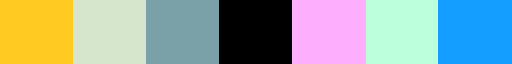

In [26]:
p.legend_dict[attributes[0]]['cmap']

## Display one object (attribute = 'lithology')

In [27]:
bh = 1
p.boreholes_3d[bh]._components

[Component({'lithology': 'sable', 'pollutant': 'vs'}),
 Component({'lithology': 'argile', 'pollutant': 'vr'}),
 Component({'lithology': 'marne', 'pollutant': 'vr'}),
 Component({'lithology': 'charbon', 'pollutant': 'vr'}),
 Component({'lithology': 'dolomie', 'pollutant': 'vr'})]

{0: Decor({'_colour': '#ffcb23', 'width': 3, 'hatch': "'..'", 'component': Component({'lithology': 'sable'})}), 1: Decor({'_colour': '#d5e6cc', 'width': 3, 'hatch': "'---'", 'component': Component({'lithology': 'argile'})}), 2: Decor({'_colour': '#7ba1a8', 'width': 3, 'hatch': None, 'component': Component({'lithology': 'marne'})}), 3: Decor({'_colour': '#000000', 'width': 3, 'hatch': None, 'component': Component({'lithology': 'charbon'})}), 4: Decor({'_colour': '#fdaffe', 'width': 3, 'hatch': None, 'component': Component({'lithology': 'dolomie'})})}


/home/yanathan/.local/share/virtualenvs/GSDMA-DRfwm83x/lib/python3.8/site-packages/striplog/striplog.py:1505: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "'". Passing invalid values is deprecated since 3.4 and will become an error two minor releases later.
  rect = mpl.patches.Rectangle(origin,
/home/yanathan/.local/share/virtualenvs/GSDMA-DRfwm83x/lib/python3.8/site-packages/striplog/legend.py:311: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "'". Passing invalid values is deprecated since 3.4 and will become an error two minor releases later.
  rect1 = patches.Rectangle((0, 0),


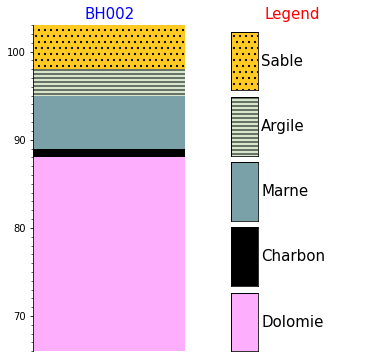

In [28]:
p.boreholes_3d[bh].log_plot()

In [29]:
sargs = dict(title='test', title_font_size=30, label_font_size=12, n_labels=0,
             fmt="%.2f", font_family="arial", color='k',interactive=True, 
             vertical=True, italic=True, shadow=False,)

In [31]:
bh=1
p.boreholes_3d[bh].plot3d(custom_legend=False, scalar_bar_args=sargs)

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

## Plot with another attribute

{0: Decor({'_colour': '#ffa500', 'width': 3, 'component': Component({'pollutant': 'vs'}), 'hatch': None}), 1: Decor({'_colour': '#00ff00', 'width': 3, 'component': Component({'pollutant': 'vr'}), 'hatch': None})}


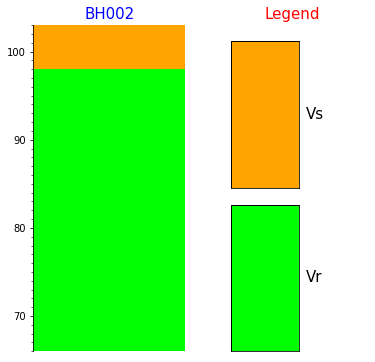

In [32]:
p.boreholes_3d[bh].log_plot(repr_attribute='pollutant')#, repr_legend=pollutant_memoris)

In [33]:
p.boreholes_3d[bh].plot3d(repr_attribute='pollutant')#, repr_legend=pollutant_memoris, show_legend=True)

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

### Display project boreholes

In [34]:
p.plot3d(repr_attribute='pollutant', labels_size=15, bg_color=["royalblue", "aliceblue"], window_size=(1300, 1000))

TypeError: plot3d() got an unexpected keyword argument 'repr_cmap'

### Boreholes in 3D using X3D for interaction within the notebook